In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [31]:
FEATURES_SOURCE = 'advance_features'
train = pd.read_csv('./data/{}/train.csv'.format(FEATURES_SOURCE), index_col=0)
test = pd.read_csv('./data/{}/test.csv'.format(FEATURES_SOURCE), index_col=0)
all_data = train.append(test)

In [32]:
train_X = train.drop('target', axis=1)
train_Y = train[['target']]
test_X = test.drop('target', axis=1)
test_Y = test[['target']]
all_data_X = all_data.drop('target', axis=1)
all_data_Y = all_data[['target']]

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [34]:
# dt.fit(train_X, train_Y)

In [35]:
# predictions_train = dt.predict(train_X).reshape(-1,1) 
# precision_train = precision_score(train_Y, dt.predict(train_X).reshape(-1,1))
# recall_train = recall_score(train_Y, dt.predict(train_X).reshape(-1,1))
# F_train = (2 * precision_train * recall_train) / (precision_train + recall_train)
# accuracy_train = accuracy_score(train_Y, predictions_train)
# # test_error = accuracy_score(predictions, train_Y)
# predictions = dt.predict(test_X).reshape(-1,1) 
# precision = precision_score(test_Y, dt.predict(test_X).reshape(-1,1))
# recall = recall_score(test_Y, dt.predict(test_X).reshape(-1,1))
# F = (2 * precision * recall) / (precision + recall)
# accuracy = accuracy_score(test_Y, predictions)
# 
# cross_val_error = cross_val_score(dt, all_data_X, all_data_Y, cv=5).mean()
# [F, precision, recall, cross_val_error]

In [36]:
from utils.metrics import get_metrics
from utils.metrics import get_metrics_kfold
# 
# predictions_train = dt.predict(train_X).reshape(-1, 1)
# print(get_metrics(train_Y, predictions_train))
# predictions = dt.predict(test_X).reshape(-1, 1)
# print(get_metrics(test_Y, predictions))
# 
# print(get_metrics_kfold(dt, all_data_X, all_data_Y))

<h3> Hyper Parameters Tuning </h3>

In [37]:
train_errors = []
cnt = 0
test_errors = []
cross_val_scores = []
depths = list(range(1, 10, 1)) + list(range(10, 24, 4))
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(train_X, train_Y)
    predictions_train = dt.predict(train_X).reshape(-1, 1)
    train_error = get_metrics(train_Y, predictions_train)
    predictions = dt.predict(test_X).reshape(-1, 1)
    test_error = get_metrics(test_Y, predictions)
    cross_val_scores.append(get_metrics_kfold(dt, all_data_X, all_data_Y))
    train_errors.append(train_error)
    test_errors.append(test_error)
    cnt = cnt + 1
    print('tuning max depth: \r {} %'.format(int((cnt / len(depths)) * 100)), end='')
    

 7 %

 15 %

 23 %

 30 %

 38 %

 46 %

 53 %

 61 %

 69 %

 76 %

 84 %

 92 %

 100 %

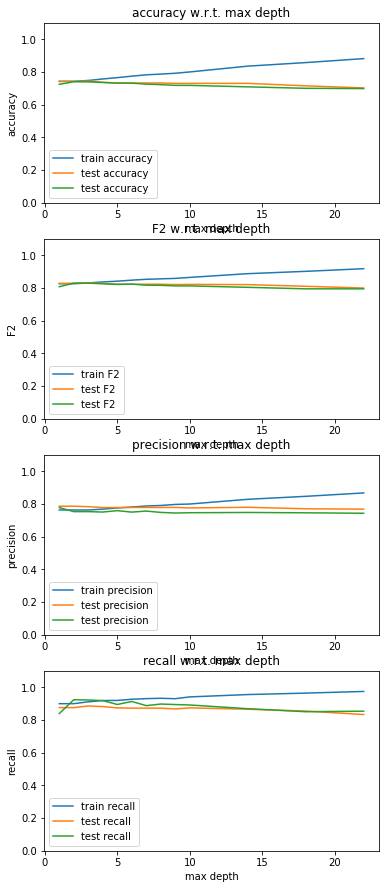

In [38]:
from utils.metrics import PARAMETERS

for parameter_i in range(len(PARAMETERS)):
    plt.subplot(len(PARAMETERS), 1, parameter_i + 1)
    plt.title('{} w.r.t. max depth'.format(PARAMETERS[parameter_i]))
    plt.xlabel('max depth')
    plt.ylabel(PARAMETERS[parameter_i])
    plt.plot(depths, [train_error[parameter_i] for train_error in train_errors], label='train {}'.format(PARAMETERS[parameter_i]))
    plt.plot(depths, [test_error[parameter_i] for test_error in test_errors], label='test {}'.format(PARAMETERS[parameter_i]))
    plt.plot(depths, [cross_val_score[parameter_i] for cross_val_score in cross_val_scores], label='test {}'.format(PARAMETERS[parameter_i]))
    plt.ylim(0,1.1)
    plt.legend()
    plt.subplots_adjust(top=3)


In [179]:
# plt.title('{} w.r.t. max depth'.format(PARAMETERS[0]))
# plt.xlabel('max depth')
# plt.ylabel(PARAMETERS[0])
# plt.plot(depths, [train_error[0] for train_error in train_errors], label='train {}'.format(PARAMETERS[0]))
# plt.plot(depths, [test_error[0] for test_error in test_errors], label='test {}'.format(PARAMETERS[0]))
# plt.plot(depths, [cross_val_score[0] for cross_val_score in cross_val_scores], label='test {}'.format(PARAMETERS[0]))
# plt.ylim(0,1.1)
# plt.savefig('./result/{}/{}.png'.format('DecisionTree_{}'.format(FEATURES_SOURCE), PARAMETERS[0]))
# plt.legend()

In [183]:
# plt.title('F2 w.r.t. max depth')
# plt.xlabel('max depth')
# plt.ylabel('F2')
# plt.plot(depths, [train_error[1] for train_error in train_errors], label='train F2')
# plt.plot(depths, [test_error[1] for test_error in test_errors], label='test F2')
# plt.plot(depths, [cross_val_score[1] for cross_val_score in cross_val_scores], label='test F2')
# # plt.xticks(list(range(50, 200, 30)))
# plt.ylim(0,1.1)
# plt.legend()

In [181]:
# ?

In [182]:
# plt.title('recall w.r.t. max depth')
# plt.xlabel('max depth')
# plt.ylabel('recall')
# plt.plot(depths, [train_error[3] for train_error in train_errors], label='train recall')
# plt.plot(depths, [test_error[3] for test_error in test_errors], label='test recall')
# plt.plot(depths, [cross_val_score[3] for cross_val_score in cross_val_scores], label='test recall')
# # plt.xticks(list(range(50, 200, 30)))
# plt.ylim(0,1.1)
# plt.legend()

In [149]:
# from utils.metrics import PARAMETERS
# best_parameter_to_use = 1 # F2
# result = pd.DataFrame()
# result['data'] = ['train', 'test', 'kfold']
# for best_parameter_to_use in range(0, 4):
#     train_final_errors = [train_error[best_parameter_to_use] for train_error in train_errors]
#     test_final_errors = [test_error[best_parameter_to_use] for test_error in test_errors]
#     cross_final_errors = [cross_error[best_parameter_to_use] for cross_error in cross_val_scores]
#     result[PARAMETERS[best_parameter_to_use]] = [max(train_final_errors), max(test_final_errors), max(cross_final_errors)]
# 


In [39]:
best_parameter_to_use = 1  # F2
results = []

train_final_errors = [train_error[best_parameter_to_use] for train_error in train_errors]
best_train_error = max(train_final_errors)
best_train_error_index = train_final_errors.index(max(train_final_errors))
results.append(list(train_errors[best_train_error_index]))


test_final_errors = [test_error[best_parameter_to_use] for test_error in test_errors]
best_test_error = max(test_final_errors)
best_test_error_index = test_final_errors.index(max(test_final_errors))
results.append(list(test_errors[best_train_error_index]))

kfold_final_errors = [kfold_error[best_parameter_to_use] for kfold_error in cross_val_scores]
best_kfold_error = max(kfold_final_errors)
best_kfold_error_index = test_final_errors.index(max(test_final_errors))
results.append(list(cross_val_scores[best_train_error_index]))

result = pd.DataFrame(results, columns=PARAMETERS)
result['data'] = ['train', 'test', 'kfold']
result

# for best_parameter_to_use in range(0, 4):
#     test_final_errors = [test_error[best_parameter_to_use] for test_error in test_errors]
#     cross_final_errors = [cross_error[best_parameter_to_use] for cross_error in cross_val_scores]
#     result[PARAMETERS[best_parameter_to_use]] = [max(train_final_errors), max(test_final_errors),
#                                                  max(cross_final_errors)]


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>accuracy</th>
      <th>F2</th>
      <th>precision</th>
      <th>recall</th>
      <th>data</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.881109</td>
      <td>0.917296</td>
      <td>0.866967</td>
      <td>0.973829</td>
      <td>train</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.702079</td>
      <td>0.799065</td>
      <td>0.767964</td>
      <td>0.832792</td>
      <td>test</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.698053</td>
      <td>0.794177</td>
      <td>0.742742</td>
      <td>0.853266</td>
      <td>kfold</td>
    </tr>
  </tbody>
</table>
</div>

In [40]:
name = 'DecisionTree_{}.csv'.format(FEATURES_SOURCE)
result.to_csv('./result/{}'.format(name), index=False)

<h1> Redundant </h1>

In [85]:
[max(train_final_errors), depths[train_final_errors.index(max(train_final_errors))]]


[1.0, 16]

In [86]:
[max(test_final_errors), depths[test_final_errors.index(max(test_final_errors))]]


[1.0, 1]

In [87]:
[max(cross_final_errors), depths[cross_final_errors.index(max(cross_final_errors))]]


[0.9742043551088777, 2]

In [89]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(train_X, train_Y)
predictions_train = dt.predict(train_X).reshape(-1, 1)
train_error = get_metrics(train_Y, predictions_train)
predictions = dt.predict(test_X).reshape(-1, 1)
test_error = get_metrics(test_Y, predictions)


In [93]:
test_error

(0.7367205542725174, 0.8438356164383561, 0.7298578199052133, 1.0)